In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
data_dir = '../data/second/'
file_path = '../data/20251111_JUNCTION_training.xlsx'
preds_df = pd.read_csv(data_dir + 'preds_2024-09-29-00_48h.csv',
    sep=";",
    decimal=",",
    parse_dates=["measured_at"],
    date_parser=lambda x: pd.to_datetime(x, utc=True),
)
data = pd.read_excel(file_path, sheet_name='training_consumption')

/tmp/ipykernel_44400/2663927228.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  preds_df = pd.read_csv(data_dir + 'preds_2024-09-29-00_48h.csv',


In [39]:
baseline = pd.read_csv('../data/baseline/validation_48h_baseline.csv',
    sep=";",
    decimal=",",
    parse_dates=["measured_at"],
    date_parser=lambda x: pd.to_datetime(x, utc=True),
)
baseline['measured_at'] = pd.to_datetime(baseline['measured_at'], utc=True)

/tmp/ipykernel_44400/1803695017.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  baseline = pd.read_csv('../data/baseline/validation_48h_baseline.csv',


In [42]:
df = data.copy()
df["measured_at"] = pd.to_datetime(df["measured_at"])

start = pd.Timestamp("2024-09-29 00:00:00", tz='UTC')
end   = start + pd.Timedelta(hours=48)

filtered = df[(df["measured_at"] >= start) & (df["measured_at"] <= end)]

In [35]:
filtered.head()

,measured_at,28,29,30,36,37,38,39,40,41,...,697,698,705,706,707,708,709,738,740,741
32136,2024-09-01 00:00:00+00:00,2.312886,0.115485,0.359390,0.234134,0.108104,0.293526,0.110184,0.107592,0.309398,...,0.084960,0.314897,0.109278,0.268304,0.104777,0.316688,0.108909,0.429759,0.073357,0.308850
32137,2024-09-01 01:00:00+00:00,2.188146,0.112864,0.368778,0.230304,0.107861,0.269803,0.107364,0.104738,0.305212,...,0.082379,0.295901,0.105909,0.254218,0.100694,0.292705,0.099412,0.402939,0.073557,0.313200
32138,2024-09-01 02:00:00+00:00,2.066952,0.110564,0.365396,0.224688,0.111999,0.282316,0.110486,0.106380,0.307774,...,0.089825,0.300951,0.106642,0.254801,0.097721,0.278018,0.100325,0.406611,0.078708,0.315285
32139,2024-09-01 03:00:00+00:00,2.151393,0.114008,0.377350,0.177975,0.127080,0.334605,0.118992,0.112972,0.322652,...,0.090541,0.337263,0.110252,0.258281,0.100107,0.280804,0.105550,0.402079,0.078551,0.361224
32140,2024-09-01 04:00:00+00:00,2.292767,0.129606,0.435104,0.181298,0.151354,0.385532,0.139080,0.127816,0.369358,...,0.099279,0.382136,0.125141,0.299447,0.110495,0.309152,0.112679,0.439084,0.090978,0.376400


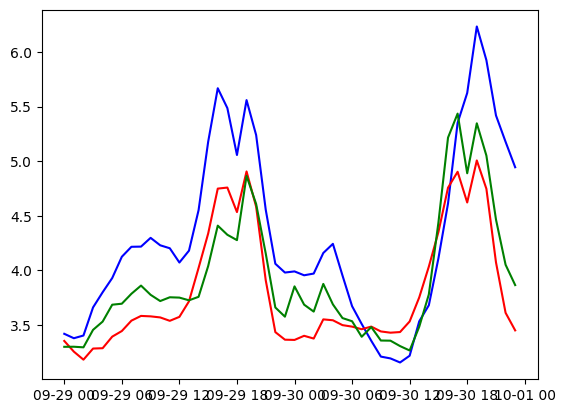

In [43]:
plt.plot(filtered["measured_at"], filtered[28], label="Actual Consumption", color='blue')

plt.plot(preds_df["measured_at"], preds_df['28'], label="Predicted Consumption", color='red')

plt.plot(baseline["measured_at"], baseline['28'], label="Baseline Consumption", color='green')

plt.show()

In [32]:
preds_df['28']

0     2.189758
1     2.090263
2     2.074089
3     2.188527
4     2.260959
5     2.437725
6     2.579016
7     2.736688
8     2.843607
9     2.881957
10    2.871884
11    2.871889
12    2.966883
13    3.140913
14    3.296581
15    3.580195
16    3.924805
17    4.060286
18    3.808518
19    4.147251
20    3.716983
21    2.876973
22    2.482982
23    2.300881
24    2.179633
25    2.097683
26    2.082831
27    2.245077
28    2.326466
29    2.421952
30    2.480512
31    2.567912
32    2.633861
33    2.672213
34    2.644888
35    2.687279
36    2.800842
37    2.991538
38    3.183887
39    3.428666
40    3.762463
41    4.001771
42    3.844626
43    4.222293
44    3.858398
45    2.914715
46    2.546738
47    2.349018
Name: 28, dtype: float64